In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Mission 1. Netfilx and Code
***

### 호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

## Mandatory Part
***
### 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

한국 작품은 총 얼마나 있는가?  
* country column을 기준으로 한다.
* "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [30]:
netflix = pd.read_csv("./netflix_titles.csv")
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [31]:
print('한국 작품의 개수 : {}'.format(len(netflix[netflix['country'] == 'South Korea'])))

한국 작품의 개수 : 183


### A) 한국 작품의 개수는 `183`개이다.

<hr>

### 생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.


## Bonus Part
***
### 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?  
* country column을 기준으로 한다.  
* 단일 국가인 경우를 기준으로 결과를 구해보자.  

In [32]:
netflix_country = netflix['show_id'].groupby(by=netflix['country']).count()
netflix_country

country
Argentina                                              50
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        1
Argentina, Chile, Peru                                  1
Argentina, France                                       1
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 5
West Germany                                            1
Zimbabwe                                                1
Name: show_id, Length: 681, dtype: int64

In [33]:
print('{}, {}' .format(netflix_country.idxmax(), netflix_country.max()))

United States, 2555


### A)가장 많은 작품이 올라간 국가는 `United States`이다.

***
# Mission 2. 가즈아!

### 서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 Moving Average(이동평균법) 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

## Mandatory Part
***
### 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

* 선의 색깔은 노란색(#f2a900) 으로 해야합니다.  
* x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.  
* 이동평균의 기준은 `Open Column`으로 계산합니다.  
* 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.  

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [35]:
bitcoin = pd.read_csv('./BitCoin.csv')
bitcoin.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [71]:
bitcoin_price = bitcoin['Open'].groupby(by=bitcoin['Date']).sum()
bitcoin_price = bitcoin_price['2016-06-01' : '2017-06-30']
bitcoin_price

Date
2016-06-01     431.86
2016-06-02     386.59
2016-06-03     400.52
2016-06-04     424.28
2016-06-05     447.94
               ...   
2017-06-26    2590.57
2017-06-27    2478.45
2017-06-28    2553.03
2017-06-29    2567.56
2017-06-30    2539.24
Name: Open, Length: 377, dtype: float64

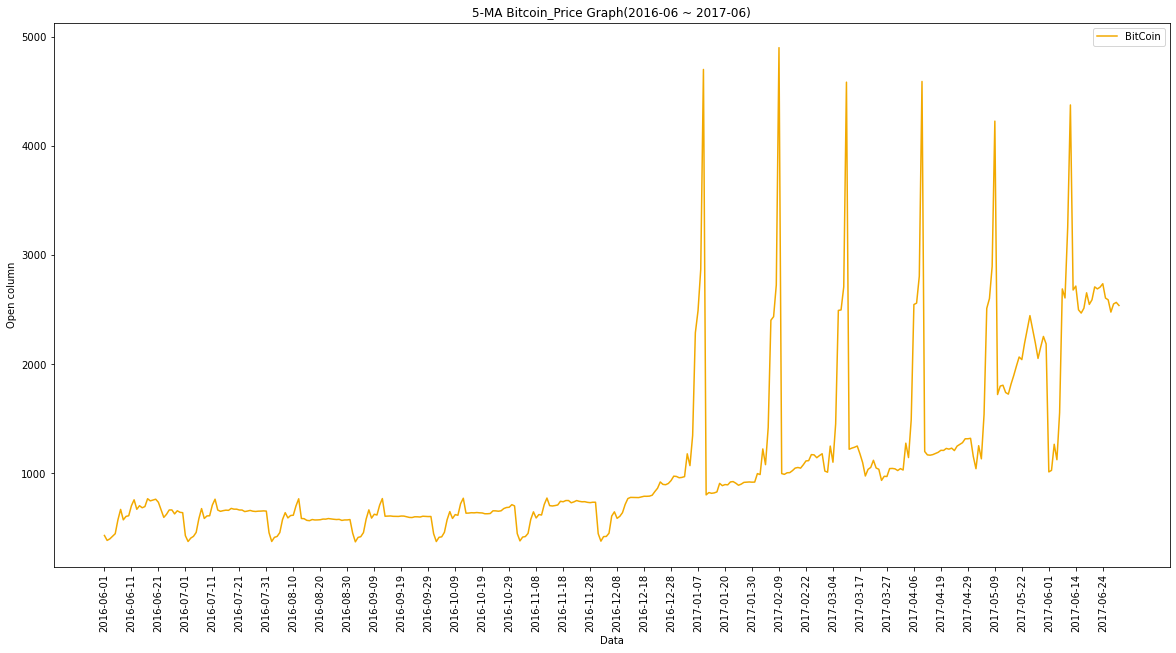

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(bitcoin_price, label="BitCoin", color='#f2a900')

plt.xlabel("Data")
plt.ylabel("Open column")
plt.title("5-MA Bitcoin_Price Graph(2016-06 ~ 2017-06)")

plt.xticks([k for i, k in enumerate(bitcoin_price.keys()) if i % 10 == 0], rotation=90)

plt.legend()

plt.show()

***
### 해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

## Bonus Part
***
### 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

* 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
* x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
* 이동평균의 기준은 Open Column으로 계산합니다.
* 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [73]:
eth = pd.read_csv('./ETH_day.csv')
eth.head(5)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [74]:
eth_price = eth['Open'].groupby(by=eth['Date']).sum()
eth_price = eth_price['2016-06-01' : '2017-06-30']
eth_price

Date
2016-06-01     14.18
2016-06-02     13.95
2016-06-03     13.90
2016-06-04     14.02
2016-06-05     13.86
               ...  
2017-06-26    278.73
2017-06-27    253.00
2017-06-28    286.21
2017-06-29    317.59
2017-06-30    293.80
Name: Open, Length: 395, dtype: float64

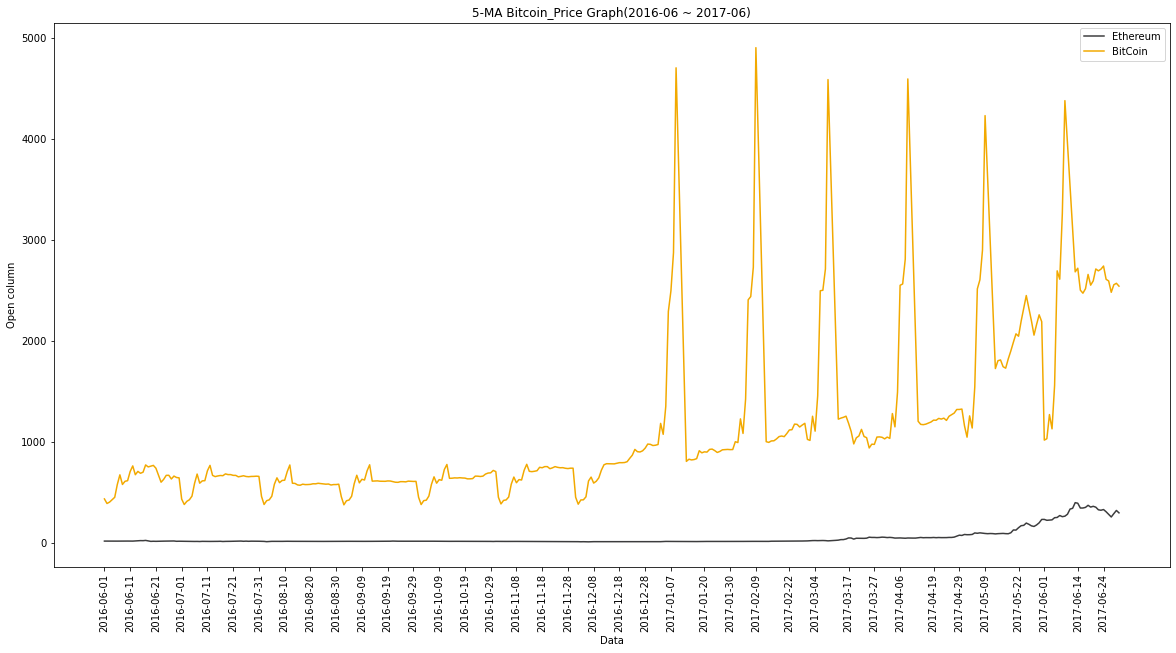

In [75]:
plt.figure(figsize=(20, 10))

plt.plot(eth_price, label="Ethereum", color='#3c3c3d')  # ethereum 먼저
plt.plot(bitcoin_price, label="BitCoin", color='#f2a900')

plt.xlabel("Data")
plt.ylabel("Open column")
plt.title("5-MA Bitcoin_Price Graph(2016-06 ~ 2017-06)")

plt.xticks([k for i, k in enumerate(bitcoin_price.keys()) if i % 10 == 0], rotation=90)

plt.legend()

plt.show()

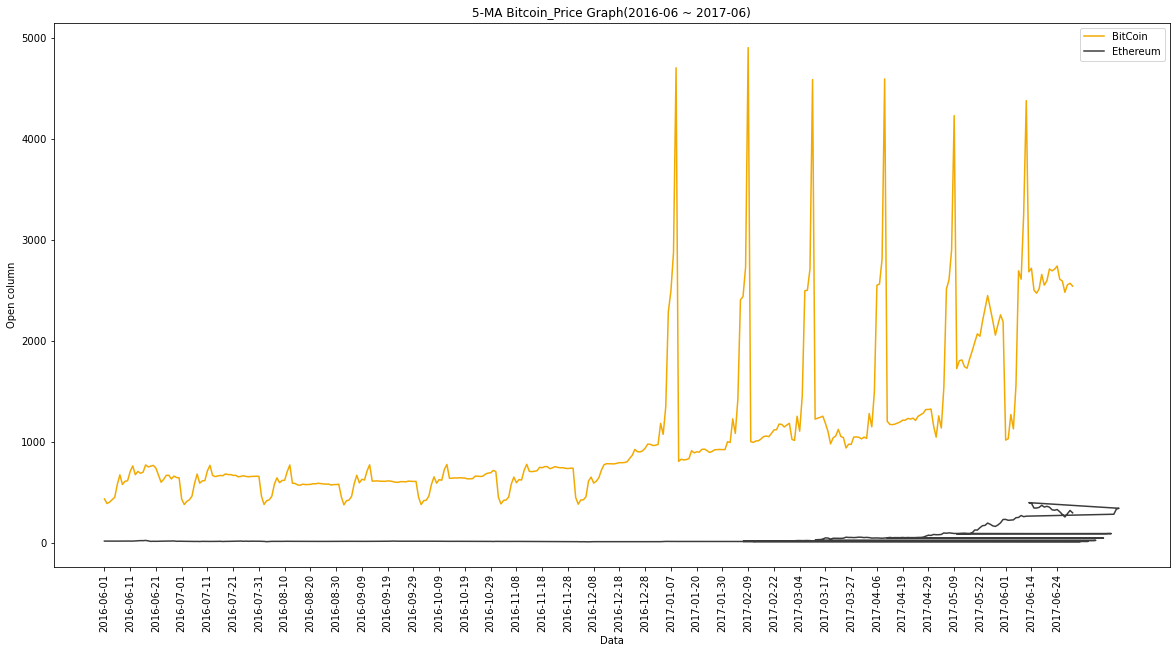

In [76]:
plt.figure(figsize=(20, 10))

plt.plot(bitcoin_price, label="BitCoin", color='#f2a900')  # Bitcoin 먼저
plt.plot(eth_price, label="Ethereum", color='#3c3c3d')


plt.xlabel("Data")
plt.ylabel("Open column")
plt.title("5-MA Bitcoin_Price Graph(2016-06 ~ 2017-06)")

plt.xticks([k for i, k in enumerate(bitcoin_price.keys()) if i % 10 == 0], rotation=90)

plt.legend()

plt.show()

### 비트코인가 이더리움의 출력 숫자가 다르다. (비트코인은 377, 이더리움은 395)  <br/>그리고 matplotlib에서 두개의 그래프를 같이 그릴 때는 먼저 plt.plot에 들어오는 함수에 맞춰 x축이 만들어진다.

### 그렇기 때문에 75번째 셀에 대해서는 이더리움이 먼저 실행되면서 x축이 맞춰지고, <br/>비트코인이 그 안으로 들어오기 때문에 제대로된 결과로 나올 수 있었다.

### 76번째 셀에 대해서는 비트코인이 먼저 실행되면서 x축이 맞춰지고, 이후에 이더리움이 들어오면서 <br/>넘치는 데이터를 담지를 못해 이더리움의 그래프가 이상하게 그려진다.